<a href="https://colab.research.google.com/github/Tadashi1999/Repo_tst/blob/master/%E6%97%A5%E6%9C%AC%E6%A0%AA%E3%83%86%E3%82%AF%E3%83%8B%E3%82%AB%E3%83%AB%E5%88%86%E6%9E%90v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ta-Libのインストール
! wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
! tar -xzvf ta-lib-0.4.0-src.tar.gz
% cd ta-lib
! ./configure --prefix=/usr
! make
! make install
! pip install Ta-lib
#import Talib as ta

In [ ]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [ ]:
start='2019-07-01'
end='2020-07-01'
df=data.DataReader('6502.JP','stooq')



In [ ]:
df.head(10)

In [31]:
#日本株を読み込んで移動平均,出来高、MACD,RSI,ボリバン
#関数
def company_stock(start,end,company_code):
  df=data.DataReader(company_code,'stooq')
  df=df[(df.index >=start) & (df.index<=end)]

  #Ta-Libのインストール
  import talib as ta

  date=df.index
  price=df['Close']
  close=df['Close']

  span01=5
  span02=25
  span03=50

  df['sma01']=price.rolling(window=span01).mean()
  df['sma02']=price.rolling(window=span02).mean()
  df['sma03']=price.rolling(window=span03).mean()

  plt.figure(figsize=(20,10))
  plt.subplot(5,1,1)

  plt.plot(date,price,label='Close',color='#99b898')
  plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
  plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
  plt.plot(date,df['sma03'],label='sma03',color='#feceab')
  plt.legend()

  plt.subplot(5,1,2)
  plt.bar(date,df['Volume'],label='Volume',color='gray')
  plt.legend()

  #MACD追加
  df['macd'],df['macdsignal'],df['macdhist']=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
  plt.subplot(5,1,3)
  plt.fill_between(date,df['macdhist'],color='gray',alpha=0.5,label='MACD_hist')
  plt.hlines(0,start,end,'gray',linestyles='dashed')
  lt.legend()
 
  #RSI追加
  df['RSI'] =ta.RSI(close,timeperiod=span02)
  plt.subplot(5,1,4)
  plt.plot(date,df['RSI'],label='RSI',color='black')
  plｌylim(0,100)
  plt.hlines([30,50,70],start,end,'black',linestyles='dashed')
  plt.legend()

  #ボリバン追加
  plt.subplot(5,1,5)
  df['upper'],df['middle'],df['lower']=ta.BBANDS(close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)
  plt.plot(date,close,label='Close',color='#99b898')
  plt.fill_between(date,df['upper'],df['lower'],color='gray',alpha=0.3)
  plt.legend()

  




ConversionError: ignored

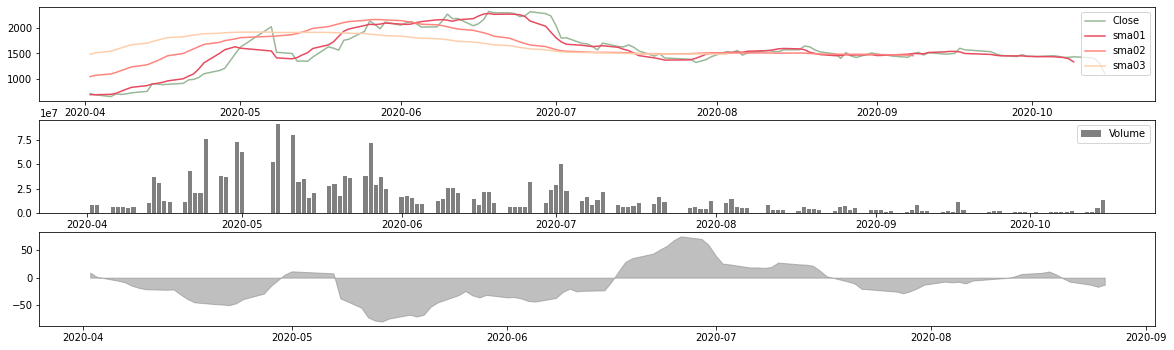

In [32]:
company_stock('2020-04-02','2020-10-16','4563.JP')